In [354]:
import camelot
import pandas as pd
import json
from functools import reduce
import matplotlib.pyplot as plt

In [2]:
def get_data(tables):
    data_frames = []
    for i in range(len(tables)):
        data_frames.append(tables[i].df)
    return data_frames        

In [3]:
if __name__ == "__main__":

    data_frames = get_data(camelot.read_pdf('edital.pdf', pages='1-54', flavor='lattice', strip_text='\n'))        
    df = reduce(lambda left,right: pd.merge(left,right,on=[0,1,2,3,4],how='outer'), data_frames)
    df.drop(0, inplace=True)
    df.rename(columns={
        0:'Estudante', 1:'Unidade', 2:'Título do Trabalho', 
        3:'Programa', 4:'Data da apresentação'},inplace=True)

    with open('data.json','w', encoding='utf-8') as file: file.write(json.dumps(df.to_dict(), ensure_ascii=False, indent=4))        
    df.to_excel('data.xlsx', sheet_name='Sheet1', index=False)

In [6]:
df

,Estudante,Unidade,Título do Trabalho,Programa,Data da apresentação
1,ABEL PEREIRA LIMA SOARES,CPCS,CARACTERÍSTICAS FÍSICAS DO SOLO DESEMPENHO AGR...,PIBIC,25/07/2019
2,ABEL PEREIRA LIMA SOARES,CPCS,DESEMPENHO AGRONÔMICO DE CULTIVARES DE SOJA CO...,PIBIC,26/07/2019
3,ADALGISA APARECIDA DE OLIVEIRA,FAALC,PRÁTICAS DE ESCRITA EM LÍNGUA PORTUGUESA POR A...,PPG,23/07/2019
4,ADÃO CAETANO DE DEUS FILHO,CPAQ,UMA REVISÃO SOBRE O ACENTO NA LÍNGUA TERENA,PIVIC,22/07/2019
5,ADAUTO FERREIRA DE SOUZA NETO,FAENG,ACESSIBILIDADE E INCLUSÃO: TECNOLOGIAS DE MOBI...,PIBIC,26/07/2019
6,ADELSON DOURADO CAVALCANTE,CPCX,A OBRA DE HENRIQUE SPENGLER: DIÁLOGOS COM A CU...,ENEX,22/07/2019
7,ADILSON CORREA DA SILVA JUNIOR,CPAN,BENEFICIOS DOS JOGOS MATEMÁTICOS PARA FORMAÇÃO...,PIBID,25/07/2019
8,ADOLPHO NILSON PRADO,CPNV,ADMINTERAÇÃO,ENEX,22/07/2019
9,ÁDRIA SAVIANO FABRICIO DA SILVA,FADIR,A DEFESA DA DEMOCRACIA COMO JUSTIFICATIVA PARA...,PIBIC,23/07/2019
10,ADRIANA FERREIRA MODESTO DE OLIVEIRA,INISA,"INTER-RELAÇÃO ENTRE FRAGILIDADE, SARCOPENIA, F...",PIBIC,24/07/2019


In [108]:
df.groupby(['Unidade']).groups.keys()

dict_keys(['CPAN', 'CPAQ', 'CPAR', 'CPCS', 'CPCX', 'CPNA', 'CPNV', 'CPPP', 'CPTL', 'ESAN', 'FAALC', 'FAAÇC', 'FACFAN', 'FACH', 'FACOM', 'FADIR', 'FAED', 'FAENG', 'FAMED', 'FAMEZ', 'FAODO', 'INBIO', 'INFI', 'INISA', 'INMA', 'INQUI', 'NHU', 'PROECE'])

In [112]:
len(df.groupby(['Unidade']).groups['CPPP'])

23

In [271]:
df.groupby(['Unidade']).count().reset_index().sort_values(by='Estudante',ascending=False)

,Unidade,Estudante,Título do Trabalho,Programa,Data da apresentação
8,CPTL,162,162,162,162
0,CPAN,95,95,95,95
17,FAENG,79,79,79,79
12,FACFAN,72,72,72,72
23,INISA,66,66,66,66
10,FAALC,64,64,64,64
19,FAMEZ,57,57,57,57
1,CPAQ,57,57,57,57
21,INBIO,56,56,56,56
3,CPCS,50,50,50,50


# **Quantidade de apresentações por campus**

In [313]:
ordenado = df.groupby(['Unidade']).count().reset_index().sort_values(by='Estudante',ascending=False)[['Unidade','Estudante']].reset_index().drop('index',axis=1)

In [320]:
qtd_excel = ordenado.rename(columns={'Estudante':'Quantidade'})

In [ ]:
qtd_excel.set_index('Unidade',inplace=True)

In [332]:
# qtd_excel.reset_index() voltar para o q era antes

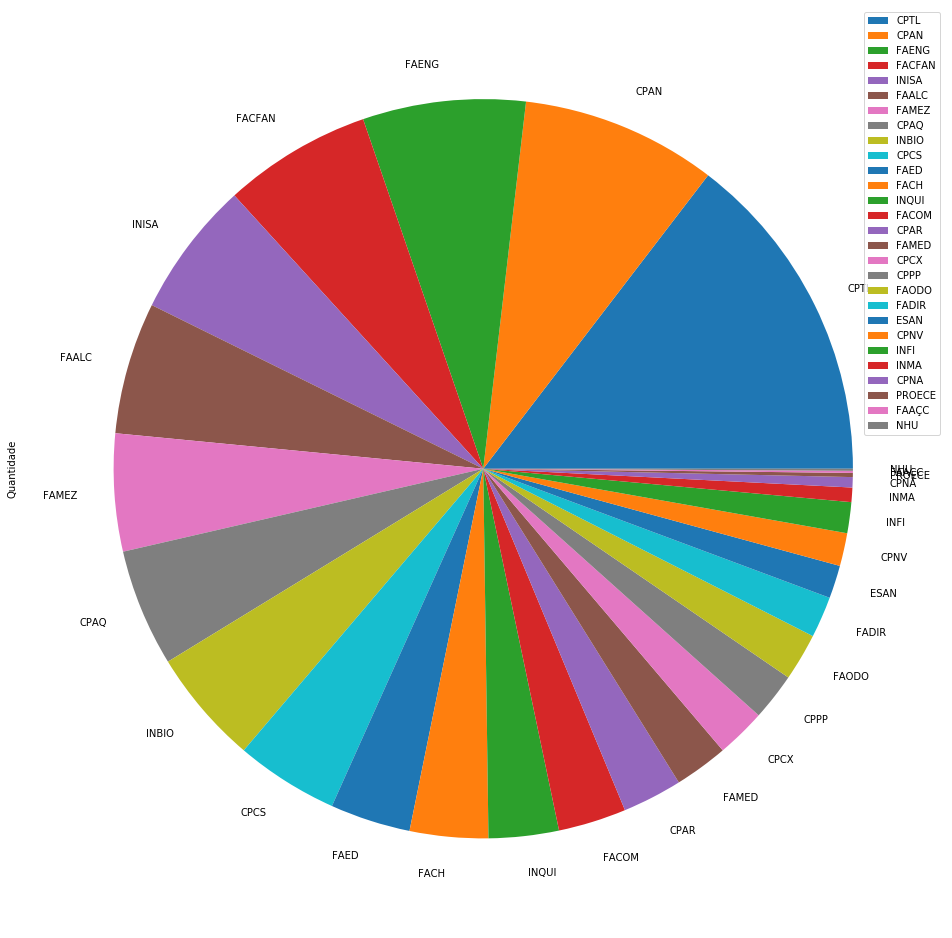

In [349]:
pie_qtd = qtd_excel.plot.pie(y='Quantidade',figsize=(17, 17))

In [350]:
pie_fig = pie_qtd.get_figure()

In [352]:
pie_fig.savefig('qtd.svg')

In [353]:
qtd_excel.to_excel('qtd_unidade.xlsx', index=False)

# **Alunos que submeteram mais de dois trabalhos**

In [260]:
x = df.groupby(['Estudante','Unidade']).count().reset_index()[['Estudante','Unidade','Data da apresentação']].reset_index().sort_values(by='Unidade',ascending=True).drop('index',axis=1)

In [261]:
estudante = x.rename(columns={'Data da apresentação':'Quantidade'})

In [266]:
aluno_excel = estudante[estudante['Quantidade']>1].reset_index().drop('index',axis=1)

In [267]:
aluno_excel

,Estudante,Unidade,Quantidade
0,GABRIEL HALLEY FARIA JARD,CPAN,2
1,LUANA LARISSA DE CARVALHO FERREIRA,CPAN,2
2,EDER DE ARRUDA INSAURALDE,CPAQ,2
3,MARIA BEATRIZ KIOMIDO MENDONÇA,CPAQ,2
4,HEVELEN KAILA BARBOSA DE QUEIROZ,CPAR,2
5,IGOR LIBÓRIO FREITAS,CPCS,2
6,ABEL PEREIRA LIMA SOARES,CPCS,2
7,MARCOS TALVANI PEREIRA DE SOUZA,CPCS,2
8,ALEXSANDRA NOGUEIRA MARTINS SILVA,CPCS,2
9,MAURICIO HIROYUKI KUBO,CPNV,2


In [288]:
aluno_excel.to_excel('qtd_aluno.xlsx',index=False)